In [555]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer

In [556]:
df=pd.read_csv(r'C:\Users\Administrator\Downloads\car data.csv')

In [537]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [538]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [539]:
df.shape

(301, 9)

In [540]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [541]:
df=df.drop_duplicates()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


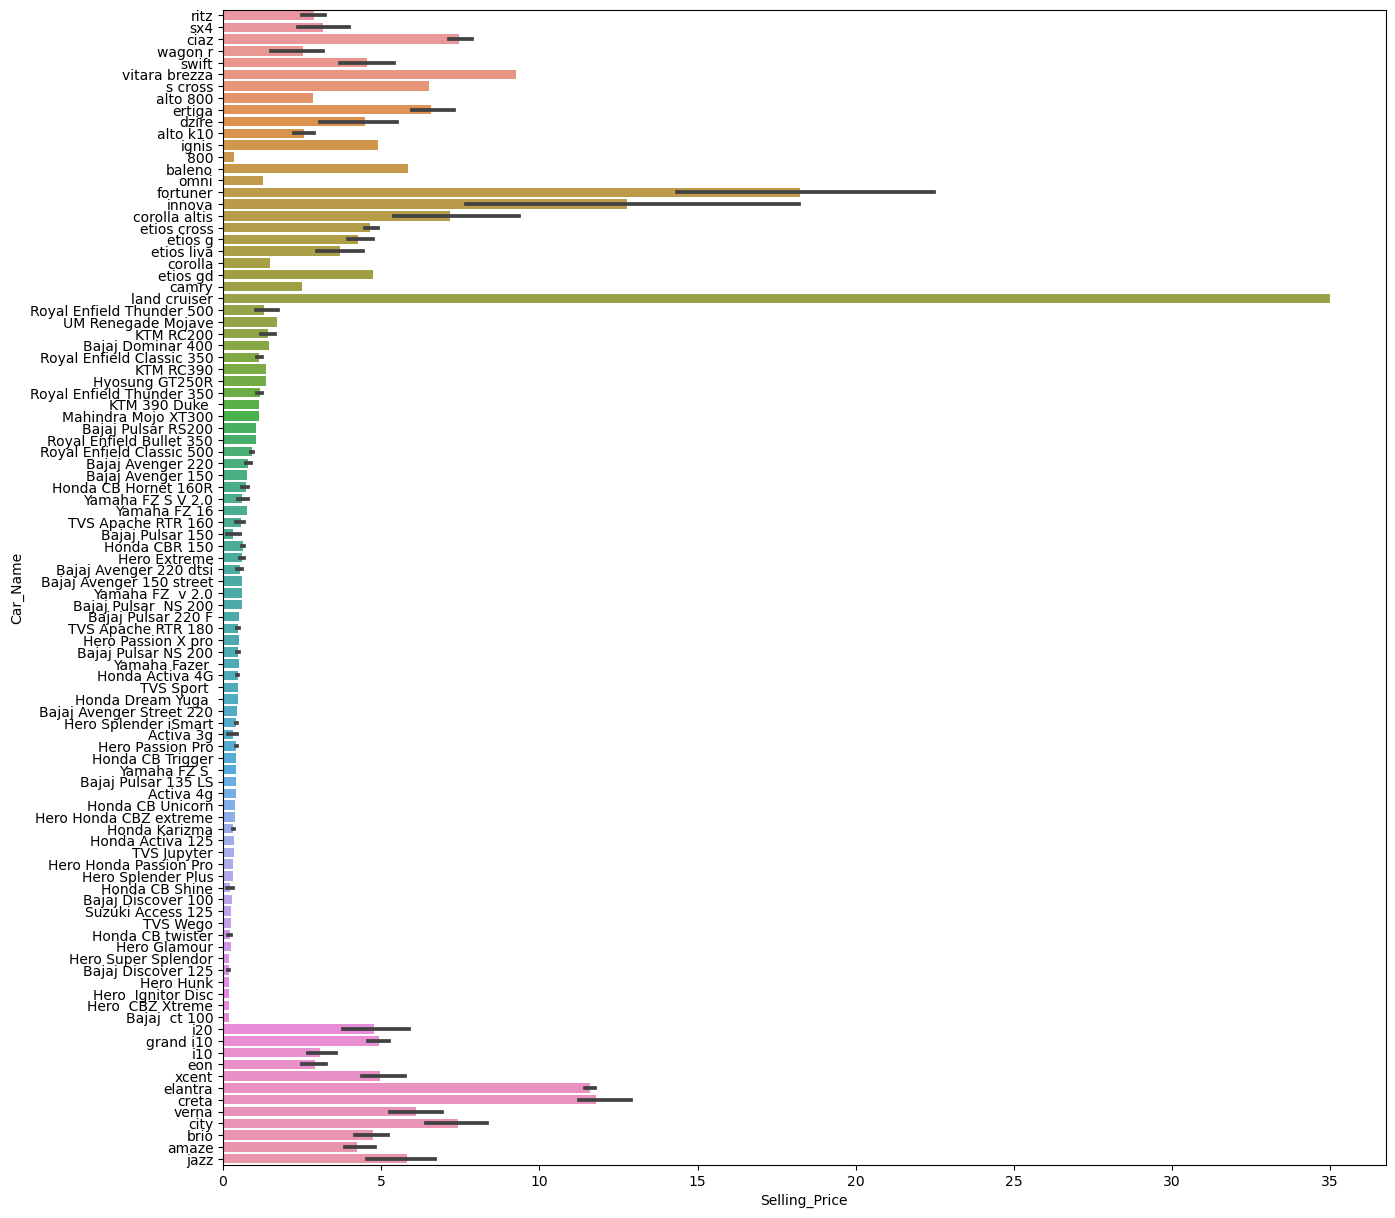

In [542]:
plt.figure(figsize=(15,15))
sns.barplot(data=df, y = 'Car_Name',x='Selling_Price')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


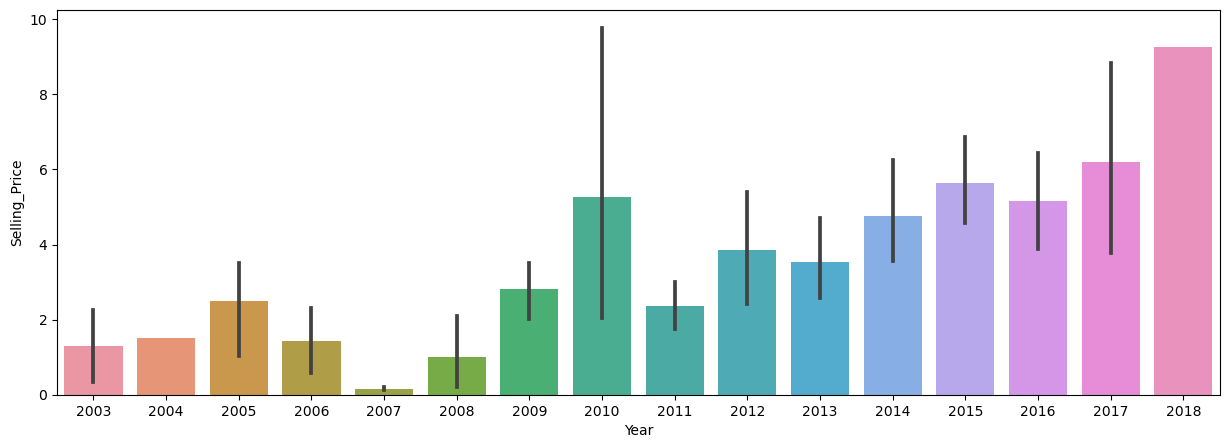

In [543]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x = 'Year',y='Selling_Price')
plt.show()

In [544]:
X=df.drop('Selling_Price',axis=1)

In [545]:
y=df['Selling_Price']

In [546]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns


numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [547]:
X2 = preprocessor.fit_transform(X)

In [548]:
X.shape

(299, 8)

In [549]:
X_train, X_test, y_train, y_test = train_test_split( 
    X2, y, test_size=0.3, random_state=50)

In [559]:
models=[LinearRegression(),Ridge(alpha=.01),Lasso(alpha=.01),ElasticNet(alpha=.01)]
for model in models:
    model.fit(X_train,y_train)
    y_test_pred = model.predict(X_test)
    
    mse=mean_squared_error(y_test, y_test_pred)
    squared_error=mse*X.shape[0]
    print(f'Sum of squared error for {model} is... {squared_error}')
    r2=r2_score(y_test, y_test_pred)
    print(f'R2 score for {model} is....{r2}')
    p=len(df.columns)
    n=X.shape[0]
    Adjusted_R2 =1-((1-r2)*(n-1))/(n-p-1)
    print(f'Adjusted R2 score for {model} is....{r2}')
    print('-----------------------------------')

Sum of squared error for LinearRegression() is... 1166.5541943222092
R2 score for LinearRegression() is....0.8855286041354312
Adjusted R2 score for LinearRegression() is....0.8855286041354312
-----------------------------------
Sum of squared error for Ridge(alpha=0.01) is... 1156.5425494147244
R2 score for Ridge(alpha=0.01) is....0.8865110248176749
Adjusted R2 score for Ridge(alpha=0.01) is....0.8865110248176749
-----------------------------------
Sum of squared error for Lasso(alpha=0.01) is... 1418.2683734275465
R2 score for Lasso(alpha=0.01) is....0.860828445684727
Adjusted R2 score for Lasso(alpha=0.01) is....0.860828445684727
-----------------------------------
Sum of squared error for ElasticNet(alpha=0.01) is... 1306.158282434554
R2 score for ElasticNet(alpha=0.01) is....0.8718295621943017
Adjusted R2 score for ElasticNet(alpha=0.01) is....0.8718295621943017
-----------------------------------


3.9015190445558834

R2 score is....0.8855286041354312


Adjusted R2 score is....0.8855286041354312
